In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import TimeseriesGenerator
import tensorflow as tf
from datetime import datetime

In [5]:
#def convert_to_date(x):
  #  return datetime.strptime(x, '%Y %m %d')

In [6]:
#data=pd.read_csv('twins_1992-1997.csv',parse_dates=[['year','month','day']],date_parser=convert_to_date,keep_date_col=False)

In [7]:
data=pd.read_csv('twins_1992-1997.csv')

In [8]:
data.head()

,year,month,day,latitude,longitude,zon.winds,mer.winds,humidity,air temp.,s.s.temp.
0,1992,1,1,5.01,-110.00,-3.3,3.6,NaN,26.39,27.40
1,1992,1,1,1.98,-140.40,-4.4,4.1,NaN,27.75,28.27
2,1992,1,1,5.00,-140.00,NaN,NaN,NaN,26.70,28.27
3,1992,1,1,-2.00,156.00,9.6,4.3,NaN,27.77,29.39
4,1992,1,1,8.04,-110.06,NaN,NaN,86.3,26.72,27.30


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77506 entries, 0 to 77505
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       77506 non-null  int64  
 1   month      77506 non-null  int64  
 2   day        77506 non-null  int64  
 3   latitude   77506 non-null  float64
 4   longitude  77506 non-null  float64
 5   zon.winds  66895 non-null  float64
 6   mer.winds  66895 non-null  float64
 7   humidity   62674 non-null  float64
 8   air temp.  72158 non-null  float64
 9   s.s.temp.  77506 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 5.9 MB


In [10]:
data['humidity'].interpolate(inplace=True)


In [11]:
data['zon.winds'].fillna(np.random.normal(data['zon.winds'].mean(),data['zon.winds'].std()),inplace=True)
data['mer.winds'].fillna(np.random.normal(data['mer.winds'].mean(),data['mer.winds'].std()),inplace=True)

In [12]:
data['humidity']=data['humidity'].fillna(data['humidity'].mean(),)

In [13]:
data=data.dropna(subset=['air temp.'])

In [14]:
data.count()

year         72158
month        72158
day          72158
latitude     72158
longitude    72158
zon.winds    72158
mer.winds    72158
humidity     72158
air temp.    72158
s.s.temp.    72158
dtype: int64

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor

In [16]:

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop(columns='s.s.temp.'))
scaled_data

array([[-1.55639769e+00, -1.66222404e+00, -1.68032766e+00, ...,
         1.23709329e+00, -3.56482691e-04, -2.86076394e-01],
       [-1.55639769e+00, -1.66222404e+00, -1.68032766e+00, ...,
         1.38262213e+00, -3.56482691e-04,  4.67605766e-01],
       [-1.55639769e+00, -1.66222404e+00, -1.68032766e+00, ...,
        -1.68057523e+00, -3.56482691e-04, -1.14281196e-01],
       ...,
       [ 1.34284577e+00,  1.55536797e+00,  1.73088586e+00, ...,
        -1.44546727e-02, -7.28397224e-01,  3.95562618e-01],
       [ 1.34284577e+00,  1.55536797e+00,  1.73088586e+00, ...,
        -3.92829640e-01,  5.42162922e-01,  3.12435909e-01],
       [ 1.34284577e+00,  1.55536797e+00,  1.73088586e+00, ...,
         6.54977961e-01,  6.96170213e-01, -2.23124138e+00]])

In [17]:


X = scaled_data
y = data["s.s.temp."] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


model = GradientBoostingRegressor()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.18296638543892194
R-squared: 0.9546793711852074


# Model deployment (for making predictions on new data)
new_data = pd.DataFrame({  # Replace with your new data structure
    # ... (Add your data features here) (all numeric)
})

# Preprocess new data using the same scale

new_data_scaled = scaler.transform(new_data)

new_data_pred = model.predict(new_data_scaled)
print(f"Predicted s.s.temp. for new data: {new_data_pred}")

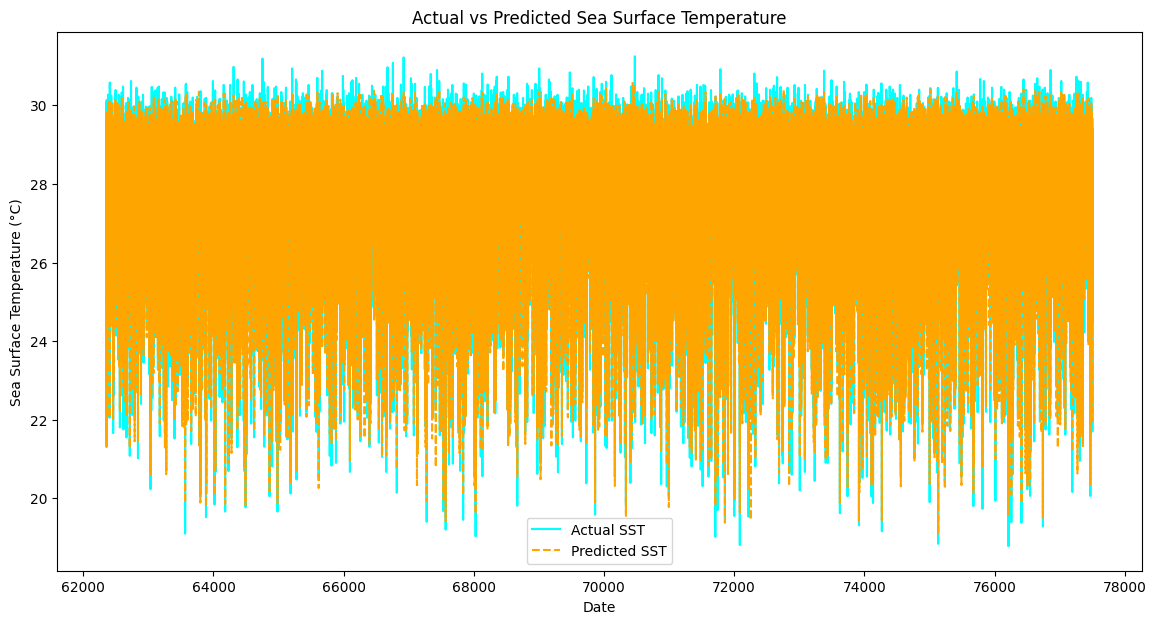

In [38]:
# Plot the results
plt.figure(figsize=(14, 7))
plt.plot(data.index[-len(y_test):], y_test, label='Actual SST', color='cyan')
plt.plot(data.index[-len(y_test):], y_pred, label='Predicted SST', color='orange', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted Sea Surface Temperature')
plt.xlabel('Date')
plt.ylabel('Sea Surface Temperature (°C)')
plt.show()